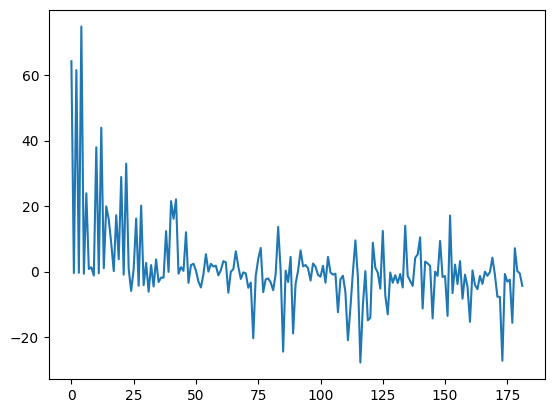

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal as sig
import numpy as np
from math import pi

# Read the CSV file containing the signal
data = pd.read_csv('pbs_25.csv')
t = data['timestamp']
values = data['uA']
plt.figure(1)
plt.plot(t,values)


<ipython-input-4-0899b8f7e4b0>:9: RuntimeWarning: divide by zero encountered in log10
  h_db=20*np.log10(abs(h))


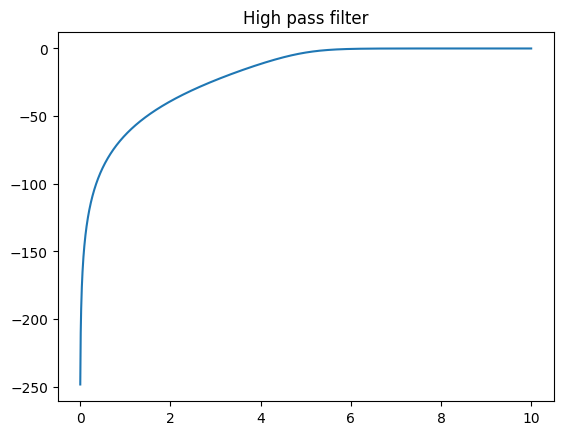

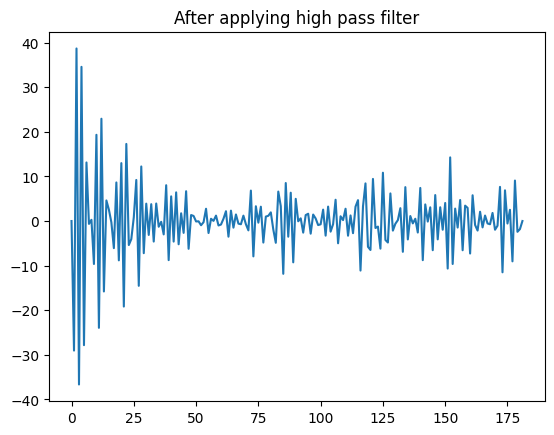

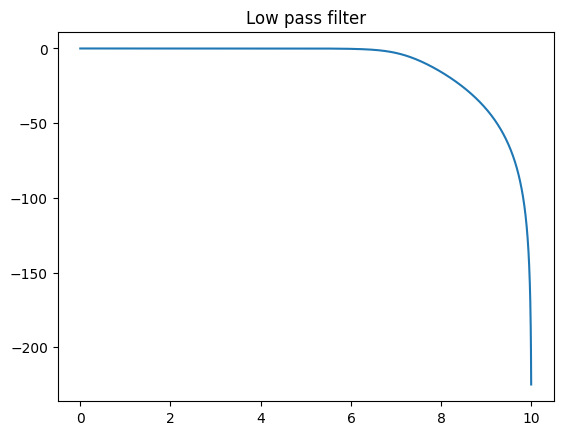

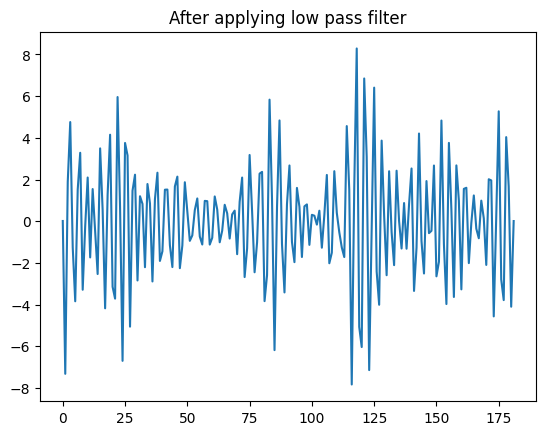

In [4]:
# Filtering the raw signal using high and low pass filter to get a required cleaned bandwidth of signal
N=4
fc=5
Fs=20
w_c=2*fc/Fs
b,a = sig.butter(N,w_c,'high')
[w,h]=sig.freqz(b,a,worN=2000)
w=Fs*w/(2*pi)
h_db=20*np.log10(abs(h))
plt.figure(2)
plt.title('High pass filter')
plt.plot(w,h_db)
o=sig.filtfilt(b,a,values)
plt.figure(3)
plt.title('After applying high pass filter')
plt.plot(o)
n=4
Fc=7
fs=20
w_c=2*Fc/fs
b,a = sig.butter(n,w_c,'low')
[w,h]=sig.freqz(b,a,worN=2000)
w=fs*w/(2*pi)
h_db=20*np.log10(abs(h))
plt.figure(4)
plt.title('Low pass filter')
plt.plot(w,h_db)
u=sig.filtfilt(b,a,o)
plt.figure(5)
plt.title('After applying low pass filter')
plt.plot(u)

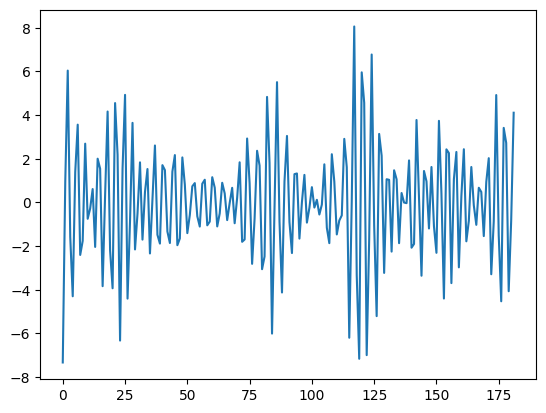

In [7]:
derivative = np.gradient(u)
plt.plot(t,derivative)

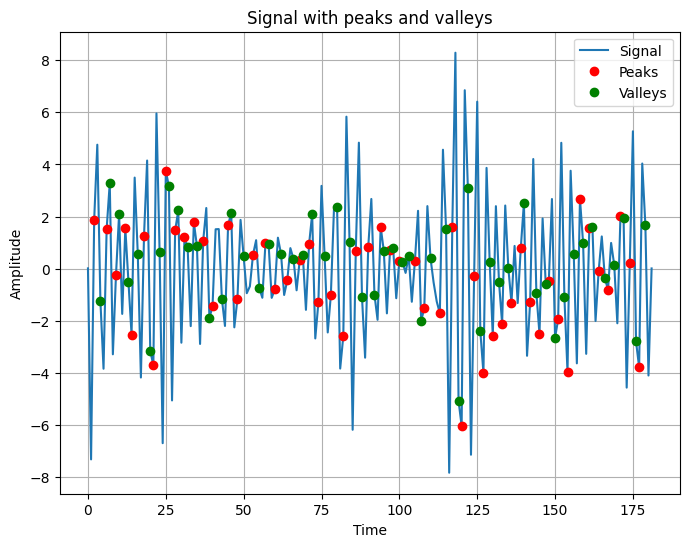

Peak-to-Peak Amplitude: 8.820942288932802
Mean Amplitude of Peaks: -0.3168381370486463
Mean Amplitude of Valleys: 0.23867360270514854
Standard Deviation of Peak Amplitudes: 1.961048533238998
Standard Deviation of Valley Amplitudes: 1.6982991018099003
Signal Energy: 1363.9455163354337
Signal Power: 7.494206133711174
Zero-Crossing Rate: 0.5934065934065934


In [8]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(derivative, height=0.2)
valleys, _ = find_peaks(-derivative, height=0.2)

# Calculate features
peak_amplitudes = u[peaks]
valley_amplitudes = u[valleys]
peak_to_peak_amplitude = np.max(peak_amplitudes) - np.min(valley_amplitudes)
mean_amplitude_peaks = np.mean(peak_amplitudes)
mean_amplitude_valleys = np.mean(valley_amplitudes)


std_deviation_peak_amplitudes = np.std(peak_amplitudes)
std_deviation_valley_amplitudes = np.std(valley_amplitudes)
signal_energy = np.sum(u**2)
signal_power = signal_energy / len(u)
zero_crossings = np.where(np.diff(np.sign(u)))[0]
zero_crossing_rate = len(zero_crossings) / len(u)



plt.figure(figsize=(8, 6))
plt.plot(t, u, label='Signal')
plt.plot(t[peaks], u[peaks], 'ro', label='Peaks')
plt.plot(t[valleys], u[valleys], 'go', label='Valleys')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal with peaks and valleys')
plt.grid(True)
plt.show()

# Display calculated amplitudes
print("Peak-to-Peak Amplitude:", peak_to_peak_amplitude)
print("Mean Amplitude of Peaks:", mean_amplitude_peaks)
print("Mean Amplitude of Valleys:", mean_amplitude_valleys)
print("Standard Deviation of Peak Amplitudes:", std_deviation_peak_amplitudes)
print("Standard Deviation of Valley Amplitudes:", std_deviation_valley_amplitudes)
print("Signal Energy:", signal_energy)
print("Signal Power:", signal_power)
print("Zero-Crossing Rate:", zero_crossing_rate)














In [10]:
import pandas as pd

# Define the feature names
feature_names = ['peak_to_peak_amplitude', 'mean_amplitude_peaks', 'mean_amplitude_valleys', 'std_deviation_peak_amplitudes', 'std_deviation_valley_amplitudes', 'signal_energy', 'signal_power']

feature_values = {}

# Calculate and store the feature values
for feature_name in feature_names:
    feature_values[feature_name] = eval(feature_name)

data_frame = pd.DataFrame([feature_values])

# Export the dataFrame to a csv file
filename = 'DA_100_features.csv'
data_frame.to_csv(filename, index=False)


# New section